In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="B3AK2lkHdqLr3fZeXChP")
project = rf.workspace("cattle-diseasee-computer-vision-dataset").project("new-cattle-diseasee-hzipc")
version = project.version(2)
dataset = version.download("folder")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 136.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to New-Cattle-Diseasee-2 in folder:: 100%|██████████| 3677/3677 [00:00<00:00, 10930.57it/s]


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO


model = YOLO('yolov8x-cls.pt')

results = model.train(
    data='/content/New-Cattle-Diseasee-2', 

    epochs=50,      
    imgsz=224,       
    batch=16,       
    patience=10,     

    project='/content/drive/MyDrive/My_YOLO_Results',
    name='cattle_disease_high_acc_model'
)

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/New-Cattle-Diseasee-2, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=cattle_disease_high_acc_model2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, pers

🖼️ Testing Image: /content/New-Cattle-Diseasee-2/test/lumpy skin/cattle_lumpy_326_png.rf.295ad49902213e54d35df73b448dd4db.jpg
✅ ඇත්ත ලෙඩේ (Actual): lumpy skin

image 1/1 /content/New-Cattle-Diseasee-2/test/lumpy skin/cattle_lumpy_326_png.rf.295ad49902213e54d35df73b448dd4db.jpg: 224x224 lumpy skin 0.87, dermatophilosis 0.11, ringworm 0.01, healthy 0.01, pediculosis 0.00, 5.3ms
Speed: 1.5ms preprocess, 5.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
🤖 AI කිව්වේ: lumpy skin
📊 විශ්වාසය: 86.92%

🎉 නියමයි! හරියටම හරි.


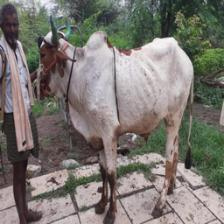

In [ ]:
from ultralytics import YOLO
import os
import random
from IPython.display import Image, display


model_path = '/content/drive/MyDrive/My_YOLO_Results/cattle_disease_high_acc_model2/weights/best.pt'
model = YOLO(model_path)

test_dir = '/content/New-Cattle-Diseasee-2/test'

all_images = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):
            all_images.append(os.path.join(root, file))

if len(all_images) > 0:
    test_image = random.choice(all_images)

    actual_disease = os.path.basename(os.path.dirname(test_image))

    print(f"🖼️ Testing Image: {test_image}")
    print(f"✅ ඇත්ත ලෙඩේ (Actual): {actual_disease}")

    results = model(test_image)

    top1 = results[0].probs.top1
    predicted_disease = results[0].names[top1]
    conf = results[0].probs.top1conf.item()

    print(f"🤖 AI කිව්වේ: {predicted_disease}")
    print(f"📊 විශ්වාසය: {conf*100:.2f}%")

    if actual_disease == predicted_disease:
        print("\n🎉 නියමයි! හරියටම හරි.")
    else:
        print("\n❌ පොඩි වැරදීමක්.")

    display(Image(test_image, width=300))
else:
    print("Test images හමු නොවුණි.")

In [ ]:
import os

base_path = '/content/New-Cattle-Diseasee-2'
train_dir = os.path.join(base_path, 'train')
val_dir = os.path.join(base_path, 'valid')

train_classes = set(os.listdir(train_dir))
val_classes = set(os.listdir(val_dir))

missing_in_val = train_classes - val_classes

print(f"Train Classes ගණන: {len(train_classes)}")
print(f"Val Classes ගණන: {len(val_classes)}")

if missing_in_val:
    print(f"\n❌ Validation එකේ නැති (Missing) ෆෝල්ඩරය: {missing_in_val}")
else:
    print("\n✅ Classes ගණන සමානයි. වෙනත් ගැටලුවක්.")

Train Classes ගණන: 9
Val Classes ගණන: 8

❌ Validation එකේ නැති (Missing) ෆෝල්ඩරය: {'Unlabeled'}


In [ ]:
import shutil
import os

dataset_path = '/content/New-Cattle-Diseasee-2'
folder_to_remove = 'Unlabeled'

print(f"🗑️ '{folder_to_remove}' ෆෝල්ඩරය සොයා ඉවත් කරමින් පවතී...")

for split in ['train', 'valid', 'test']:
    folder_path = os.path.join(dataset_path, split, folder_to_remove)

    if os.path.exists(folder_path):
        try:
            shutil.rmtree(folder_path) 
            print(f"✅ ඉවත් කළා: {folder_path}")
        except Exception as e:
            print(f"❌ දෝෂයක්: {e}")
    else:
        print(f"ℹ️ හමු නොවුණි (දැනටමත් නැත): {folder_path}")

print("\n🎉 'Unlabeled' පන්තිය සාර්ථකව ඉවත් කළා! දැන් Classes ගණන සමාන විය යුතුයි.")

🗑️ 'Unlabeled' ෆෝල්ඩරය සොයා ඉවත් කරමින් පවතී...
✅ ඉවත් කළා: /content/New-Cattle-Diseasee-2/train/Unlabeled
ℹ️ හමු නොවුණි (දැනටමත් නැත): /content/New-Cattle-Diseasee-2/valid/Unlabeled
ℹ️ හමු නොවුණි (දැනටමත් නැත): /content/New-Cattle-Diseasee-2/test/Unlabeled

🎉 'Unlabeled' පන්තිය සාර්ථකව ඉවත් කළා! දැන් Classes ගණන සමාන විය යුතුයි.
